### Codio Activity 6.2: Analyzing the Results of PCA

**Expected Time: 60 Minutes**

**Total Points: 20**

This activity explores principal component analysis through two examples -- image data and tabular data. These examples are meant to demonstrate how PCA extracts important information from the data while reducing its dimensionality.

### Index:

- [Problem 1](#Problem-1)
- [Problem 2](#Problem-2)
- [Problem 3](#Problem-3)
- [Problem 4](#Problem-4)
- [Problem 5](#Problem-5)


In [1]:
from scipy.linalg import svd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_olivetti_faces, fetch_california_housing

#### The Datasets

Both datasets are built in to the `sklearn` library.  The first is a familiar set of faces as 1-Dimensional Arrays, and the second is a dataset on housing prices in california neighborhoods.  The image data is limited to a single image and assigned to the variable `image` below.  The housing data is displayed as a DataFrame with the `.frame` attribute after setting `as_frame = True`.  

In [2]:
# faces_data = pd.read_csv("data/faces.csv")
faces_data = pd.DataFrame(fetch_olivetti_faces(data_home="data").data)
cali_housing = fetch_california_housing(
    return_X_y=False, as_frame=True, data_home="data"
)

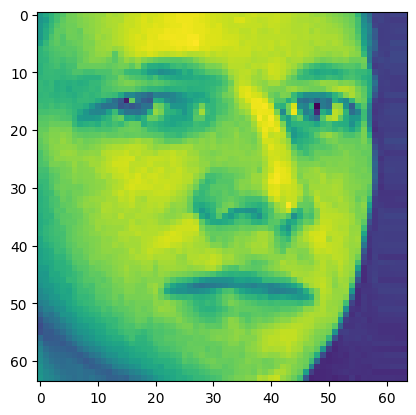

In [3]:
image = faces_data.iloc[4].values.reshape(64, 64)
plt.imshow(image)

In [4]:
df = cali_housing.frame.head(50)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### Principal Component Analysis 

Recall the steps to perform Principal Component Analysis on an array.  

```
- standardize the data
- perform SVD
- select how many components to keep
```

From here, depending on the goal you will either eliminate all but the top `r` values in $\Sigma$ or evaluate the product of $U_r \dot \Sigma_r$.

[Back to top](#Index:) 

## Problem 1

### Function to Standardize and Factor

**4 Points**

Complete the function svd_norm below.  This function takes in an array, scales the values, and returns three arrays as a result of the singular value decomposition on the scaled array, $U, \Sigma, VT$.  


In [5]:
### GRADED
def svd_norm(X):
    (U, sigma, VT) = svd((X - X.mean()) / X.std(), full_matrices=False)
    Sigma = np.diag(sigma)
    return (U, Sigma, VT)


(U, Sigma, VT) = svd_norm(image)
print(U.shape, Sigma.shape, VT.shape)

(64, 64) (64, 64) (64, 64)


[Back to top](#Index:) 

## Problem 2

### Reconstructing the Image

**4 Points**

Below, create a copy of the $\Sigma$ matrix with `np.copy` and assign it to `Sigma_copy` below.  Set all but the first 5 singular values (first 25 values - 5x5 matrix) to zero.  Reconstruct the original image by multiplying $U \Sigma_{copy} VT$ and assign to `simpler_image`.  Note how much information from the image is captured in the first five singular values!

In [6]:
# Also do simpler reconstruction by selecting columns from the PCA and mapping back with VT
# X_PCA = U @ Sigma
# print(X_PCA.shape)
# # plt.imshow(X_PCA)
# V = VT.T
# X_PCA_5 = X_PCA[:, :5] @ V[:, :5].T
# print(X_PCA_5.shape)
# # plt.imshow(X_PCA_5 - simpler_image)
# display(np.allclose(X_PCA_5, simpler_image))

(64, 64)


Text(0.5, 1.0, 'Image Reconstructed from first 5 Singular Values')

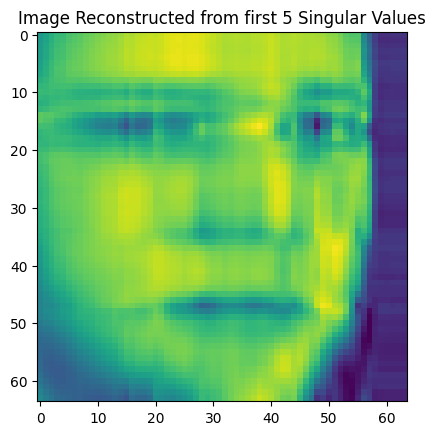

In [7]:
### GRADED
(U, Sigma, VT) = svd_norm(image)  # must redefine because the grading cell overwrites it
Sigma_copy = np.copy(Sigma)
Sigma_copy[5:, 5:] = 0.0
simpler_image = U @ Sigma_copy @ VT

# Answer check
print(simpler_image.shape)
plt.imshow(simpler_image)
plt.title("Image Reconstructed from first 5 Singular Values")

[Back to top](#Index:) 

## Problem 3

### Repeat for Tabular Data

**4 Points**

As the example above demonstrates, using Principal Component Analysis is a way of extracting important information from the data through the SVD.  Now, you are to extract the matrix factorization from the SVD using the housing data `df`.  The earlier `svd_norm` function should work to factor a DataFrame.  Use your function to extract $U, \Sigma, VT$ from the DataFrame.  Assign your results to `U, Sigma, VT` below.

In [8]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [9]:
target_var = "MedHouseVal"
target_data = df[target_var]
df_no_target = df.drop(columns=target_var)
df_norm = (df_no_target - df_no_target.mean()) / df_no_target.std()
(U_df, e_df, VT_df) = svd(df_norm, full_matrices=True)
print(U_df.shape, e_df.shape, VT_df.shape)

(50, 50) (8,) (8, 8)


In [10]:
E_df = np.diag(e_df)
comp = E_df @ VT_df
ev_from_sv = e_df**2 / (len(df) - 1)
ev_ratio = ev_from_sv / ev_from_sv.sum()
cum_ev_ratio = ev_ratio.cumsum()

for k in range(len(comp)):
    vec = comp[k, :]
    norm_fac = np.sqrt((np.abs(vec) ** 2).sum())  # --> singular value
    vec /= norm_fac
    pp = np.round(np.abs(vec), 2)
    most_important = pp.argmax()
    print(
        "Component = %d EV Ratio = %6.2f Cum EV = %6.2f Most Important Feature = %d Feature Importance = %s (norm fac = %5.2f ~ sigma = %5.2f)"
        % (
            k + 1,
            ev_ratio[k] * 100.0,
            cum_ev_ratio[k] * 100.0,
            most_important,
            pp,
            norm_fac,
            e_df[k],
        )
    )

Component = 1 EV Ratio =  38.58 Cum EV =  38.58 Most Important Feature = 0 Feature Importance = [0.53 0.19 0.43 0.25 0.18 0.05 0.44 0.45] (norm fac = 12.30 ~ sigma = 12.30)
Component = 2 EV Ratio =  19.88 Cum EV =  58.46 Most Important Feature = 5 Feature Importance = [0.   0.16 0.38 0.28 0.47 0.67 0.2  0.21] (norm fac =  8.83 ~ sigma =  8.83)
Component = 3 EV Ratio =  14.03 Cum EV =  72.49 Most Important Feature = 1 Feature Importance = [0.06 0.68 0.04 0.64 0.01 0.06 0.23 0.25] (norm fac =  7.42 ~ sigma =  7.42)
Component = 4 EV Ratio =  11.59 Cum EV =  84.08 Most Important Feature = 4 Feature Importance = [0.22 0.44 0.08 0.27 0.52 0.45 0.16 0.41] (norm fac =  6.74 ~ sigma =  6.74)
Component = 5 EV Ratio =   8.44 Cum EV =  92.52 Most Important Feature = 4 Feature Importance = [0.01 0.42 0.41 0.36 0.65 0.08 0.31 0.03] (norm fac =  5.75 ~ sigma =  5.75)
Component = 6 EV Ratio =   4.13 Cum EV =  96.65 Most Important Feature = 6 Feature Importance = [0.26 0.05 0.   0.44 0.13 0.38 0.74 0.1

In [11]:
from sklearn.decomposition import PCA

# pca.components_ has shape [n_components, n_features]
pca = PCA(n_components=df_norm.shape[1], random_state=123)
df_pca = pca.fit_transform(df_norm)

# Importance of each feature to output decomposition is represented by the absolute value of the
a = np.abs(pca.components_)
for k in range(len(a)):
    most_important = a[k, :].argmax()
    print(
        "Component = %d Most Important Feature = %d Feature Importance = %s"
        % (k + 1, most_important, np.round(a[k, :], 2))
    )

Component = 1 Most Important Feature = 0 Feature Importance = [0.53 0.19 0.43 0.25 0.18 0.05 0.44 0.45]
Component = 2 Most Important Feature = 5 Feature Importance = [0.   0.16 0.38 0.28 0.47 0.67 0.2  0.21]
Component = 3 Most Important Feature = 1 Feature Importance = [0.06 0.68 0.04 0.64 0.01 0.06 0.23 0.25]
Component = 4 Most Important Feature = 4 Feature Importance = [0.22 0.44 0.08 0.27 0.52 0.45 0.16 0.41]
Component = 5 Most Important Feature = 4 Feature Importance = [0.01 0.42 0.41 0.36 0.65 0.08 0.31 0.03]
Component = 6 Most Important Feature = 6 Feature Importance = [0.26 0.05 0.   0.44 0.13 0.38 0.74 0.17]
Component = 7 Most Important Feature = 7 Feature Importance = [0.18 0.27 0.54 0.08 0.14 0.43 0.21 0.59]
Component = 8 Most Important Feature = 0 Feature Importance = [0.75 0.14 0.45 0.23 0.11 0.07 0.05 0.37]


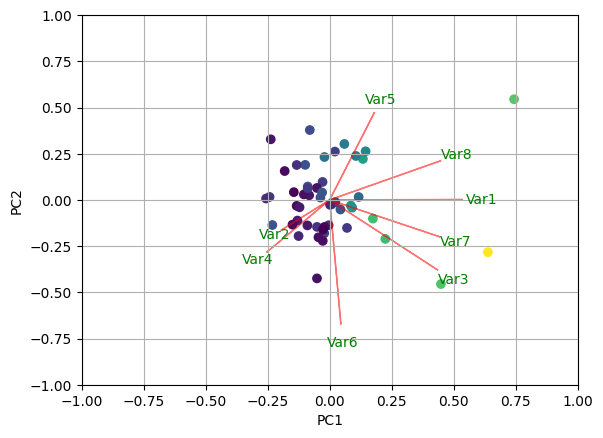

In [12]:
def biplot(score, coeff, labels=None):
    xs = score[:, 0]
    ys = score[:, 1]
    n = coeff.shape[0]
    scalex = 1.0 / (xs.max() - xs.min())
    scaley = 1.0 / (ys.max() - ys.min())
    plt.scatter(xs * scalex, ys * scaley, c=target_data)
    for i in range(n):
        plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color="r", alpha=0.5)
        if labels is None:
            plt.text(
                coeff[i, 0] * 1.15,
                coeff[i, 1] * 1.15,
                "Var" + str(i + 1),
                color="g",
                ha="center",
                va="center",
            )
        else:
            plt.text(
                coeff[i, 0] * 1.15,
                coeff[i, 1] * 1.15,
                labels[i],
                color="g",
                ha="center",
                va="center",
            )

    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()


biplot(df_pca[:, 0:2], np.transpose(pca.components_[0:2, :]))
plt.show()

In [13]:
### GRADED

(U, Sigma, VT) = svd_norm(df)

# Answer check
print(type(U))
print(df.shape, Sigma.shape, VT.shape)

<class 'numpy.ndarray'>
(50, 9) (9, 9) (9, 9)


[Back to top](#Index:) 

## Problem 4

## Function to project into lower dimension `r`

**4 Points**

Complete the function `pca` below.  This function takes two arguments, `X` and `r` where `X` is an array or DataFrame and `r` is dimension to project the data down into.  The function should return a `DataFrame` with columns labeled `['pca_1', 'pca_2', ..., 'pca_r']`.  

In [14]:
### GRADED
def pca(X, r=5):
    (U, Sigma, _) = svd_norm(X)
    Xtilde_rr = U[:, :r] @ Sigma[:r, :r]
    return pd.DataFrame(Xtilde_rr, columns=["pca_" + str(k + 1) for k in range(r)])


# Answer check
XT = pca(df, r=2)
print(XT.shape)
display(XT.head())

(50, 2)


,pca_1,pca_2
0,-6.733861,-1.878247
1,-6.997582,3.186467
2,-4.629262,-2.940347
3,-2.755903,-1.310675
4,-2.389522,-0.580863


[Back to top](#Index:) 

## Problem 5

### Converting a New Datapoint

**4 Points**

Suppose we have a new house given by the DataFrame below:

<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th></th>      <th>MedInc</th>      <th>HouseAge</th>      <th>AveRooms</th>      <th>AveBedrms</th>      <th>Population</th>      <th>AveOccup</th>      <th>Latitude</th>      <th>Longitude</th>      <th>MedHouseVal</th>    </tr>  </thead>  <tbody>    <tr>      <th>0</th>      <td>3.87</td>      <td>28.64</td>      <td>5.43</td>      <td>1.1</td>      <td>1425.48</td>      <td>3.07</td>      <td>35.63</td>      <td>-119.57</td>      <td>2.07</td>    </tr>  </tbody></table>

Use your `pca` function to project this new house into 2 dimensions.  First, scale your data according to the mean and standard deviation of `df`.  Assign the normalized data to `normed_newhome` below.  Assign the results of the pca transformation on the scaled house data as a DataFrame with columns `pca_1` and `pca_2` to `ans5` below.

Hint: Refer to dr. Gomes’s video (Video 6.3 and 6.4)

In [15]:
### GRADED
newhome = pd.DataFrame(
    [[3.87, 28.64, 5.43, 1.1, 1425.48, 3.07, 35.63, -119.57, 2.07]], columns=df.columns
)
# newhome = df.head(1)  # --> verify get same result as first row of above

normed_newhome = (newhome - df.mean()) / df.std()
(_, _, VT) = svd_norm(df)
V = VT.T
r = 2
ans5 = normed_newhome @ V[:, :r]
ans5.columns = ["pca_" + str(k + 1) for k in range(r)]

# Answer check
# print(ans5.shape)
print(type(ans5))
ans5

<class 'pandas.core.frame.DataFrame'>


,pca_1,pca_2
0,-18.728782,88.013992


Both of these examples offer insight to how PCA can reduce the dimensionality of your data while keeping important information about underlying relationships in tact.  